In [1]:
import pandas as pd
import olga.load_model as load_model
import olga.generation_probability as pgen
import os

In [2]:
df = pd.read_csv('../data/output_data/exp_AB_wide4.csv', index_col=0)

In [3]:
df.head()

,junction_aa,junction,v_call,j_call,decombinator_id,ID,control,PCR,chain,proportion_-3,...,total_-2,total_-1,total_0,total_1,total_2,total_3,total_4,total_14,max_timepoint,max_timepoint_class
1,CAARAIGNTPLVF,TGTGCAGCAAGGGCCATCGGAAACACACCTCTTGTCTTT,TRAV29/DV5,TRAJ29,"23, 17, 2, 8, GGCCATC",17,True,NaN,alpha,NaN,...,NaN,NaN,85012.0,90223.0,78873.0,65517.0,65456.0,NaN,proportion_1,und
2,CAASIWNYGGSQGNLIF,TGTGCAGCAAGTATATGGAATTATGGAGGAAGCCAAGGAAATCTCA...,TRAV13-1,TRAJ42,"6, 31, 0, 1, TATG",17,True,NaN,alpha,NaN,...,NaN,NaN,85012.0,90223.0,78873.0,65517.0,65456.0,NaN,proportion_2,und
3,CAASNQAGTALIF,TGTGCAGCAAGTAACCAGGCAGGAACTGCTCTGATCTTT,TRAV13-1,TRAJ15,"6, 5, 0, 3,",17,True,NaN,alpha,NaN,...,NaN,NaN,85012.0,90223.0,78873.0,65517.0,65456.0,NaN,proportion_2,und
4,CACASKIIF,TGTGCTTGTGCTTCCAAGATAATCTTT,TRAV24,TRAJ3,"18, 18, 5, 11, TT",17,True,NaN,alpha,NaN,...,NaN,NaN,85012.0,90223.0,78873.0,65517.0,65456.0,NaN,proportion_2,und
5,CACGNTGFQKLVF,TGTGCTTGCGGGAACACAGGCTTTCAGAAACTTGTATTT,TRAV2,TRAJ8,"13, 48, 8, 1, TGCGG",17,True,NaN,alpha,NaN,...,NaN,NaN,85012.0,90223.0,78873.0,65517.0,65456.0,NaN,proportion_1,und


In [4]:
generative_model = load_model.GenerativeModelVDJ()
marginals_file_name = '../../OLGA/olga/default_models/human_T_beta/model_marginals.txt'
generative_model.load_and_process_igor_model(marginals_file_name)

params_file_name = '../../OLGA/olga/default_models/human_T_beta/model_params.txt'
V_anchor_pos_file ='../../OLGA/olga/default_models/human_T_beta/V_gene_CDR3_anchors.csv'
J_anchor_pos_file = '../../OLGA/olga/default_models/human_T_beta/J_gene_CDR3_anchors.csv'
genomic_data = load_model.GenomicDataVDJ()
genomic_data.load_igor_genomic_data(params_file_name, V_anchor_pos_file, J_anchor_pos_file)

In [5]:
pgen_b = pgen.GenerationProbabilityVDJ(generative_model, genomic_data)

In [6]:
generative_model = load_model.GenerativeModelVJ()
marginals_file_name = '../../OLGA/olga/default_models/human_T_alpha/model_marginals.txt'
generative_model.load_and_process_igor_model(marginals_file_name)

params_file_name = '../../OLGA/olga/default_models/human_T_alpha/model_params.txt'
V_anchor_pos_file ='../../OLGA/olga/default_models/human_T_alpha/V_gene_CDR3_anchors.csv'
J_anchor_pos_file = '../../OLGA/olga/default_models/human_T_alpha/J_gene_CDR3_anchors.csv'
genomic_data = load_model.GenomicDataVJ()
genomic_data.load_igor_genomic_data(params_file_name, V_anchor_pos_file, J_anchor_pos_file)

In [7]:
pgen_a = pgen.GenerationProbabilityVJ(generative_model, genomic_data)

In [8]:
print(df)

            junction_aa                                           junction  \
1         CAARAIGNTPLVF            TGTGCAGCAAGGGCCATCGGAAACACACCTCTTGTCTTT   
2     CAASIWNYGGSQGNLIF  TGTGCAGCAAGTATATGGAATTATGGAGGAAGCCAAGGAAATCTCA...   
3         CAASNQAGTALIF            TGTGCAGCAAGTAACCAGGCAGGAACTGCTCTGATCTTT   
4             CACASKIIF                        TGTGCTTGTGCTTCCAAGATAATCTTT   
5         CACGNTGFQKLVF            TGTGCTTGCGGGAACACAGGCTTTCAGAAACTTGTATTT   
...                 ...                                                ...   
9529     CASSPGPKYNEQFF         TGTGCCAGCAGCCCGGGACCGAAGTACAATGAGCAGTTCTTC   
9530    CASSQDVLAKNIQYF      TGTGCCAGCAGCCAAGACGTCCTAGCCAAAAACATTCAGTACTTC   
9531     CASSQEEGSSEAFF         TGTGCCAGCAGCCAAGAGGAGGGATCCTCTGAAGCTTTCTTT   
9532    CASSQVTLSNAEAFF      TGTGCCAGCAGCCAAGTTACGTTGAGCAACGCTGAAGCTTTCTTT   
9533  CASSTPNGLAAGDTQYF  TGTGCCAGCTCGACCCCAAATGGACTAGCGGCGGGAGATACGCAGT...   

          v_call   j_call                         decombinator_

In [9]:
df['pgen'] = ''

In [10]:
dfa = df.loc[df['chain'] == 'alpha']
dfb = df.loc[df['chain'] == 'beta']

In [11]:
dfa['pgen'] = dfa.apply(lambda row: 
                        pgen_a.compute_aa_CDR3_pgen(row['junction_aa'], 
                                row['v_call'], row['j_call'], True), axis=1)
dfb['pgen'] = dfb.apply(lambda row: 
                        pgen_b.compute_aa_CDR3_pgen(row['junction_aa'], 
                        row['v_call'], row['j_call'], True), axis=1)
# TRBV1, TRBV17, TRBV21-1, TRBV23-1, TRBV5-3, TRBV5-7, TRBV6-7, TRBV7-5 are pseudogenes that decombinator does not clean up

/tmp/ipykernel_6391/191805640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['pgen'] = dfa.apply(lambda row:


Unfamiliar V gene/allele: TRBV21-1
No recognized V genes/alleles. Using default V_usage_mask
Unfamiliar V gene/allele: TRBV21-1
No recognized V genes/alleles. Using default V_usage_mask
Unfamiliar V gene/allele: TRBV21-1
No recognized V genes/alleles. Using default V_usage_mask
Unfamiliar V gene/allele: TRBV21-1
No recognized V genes/alleles. Using default V_usage_mask
Unfamiliar V gene/allele: TRBV21-1
No recognized V genes/alleles. Using default V_usage_mask
Unfamiliar V gene/allele: TRBV21-1
No recognized V genes/alleles. Using default V_usage_mask
Unfamiliar V gene/allele: TRBV21-1
No recognized V genes/alleles. Using default V_usage_mask
Unfamiliar V gene/allele: TRBV21-1
No recognized V genes/alleles. Using default V_usage_mask
Unfamiliar V gene/allele: TRBV21-1
No recognized V genes/alleles. Using default V_usage_mask
Unfamiliar V gene/allele: TRBV21-1
No recognized V genes/alleles. Using default V_usage_mask
Unfamiliar V gene/allele: TRBV21-1
No recognized V genes/alleles. Usin

/tmp/ipykernel_6391/191805640.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfb['pgen'] = dfb.apply(lambda row:


In [12]:
dfa.loc[dfa['pgen'] == 0]

,junction_aa,junction,v_call,j_call,decombinator_id,ID,control,PCR,chain,proportion_-3,...,total_-1,total_0,total_1,total_2,total_3,total_4,total_14,max_timepoint,max_timepoint_class,pgen
24,CASETSGSRLTF,TGTGCTTCTGAAACCAGTGGCTCTAGGTTGACCTTT,TRAV12-3,TRAJ58,"5, 57, 8, 5, TTCT",17,True,NaN,alpha,NaN,...,NaN,85012.0,90223.0,78873.0,65517.0,65456.0,NaN,proportion_0,und,0.0
42,CAVSPAGELIF,TGTGCCGTGAGCCCCGCGGGCGAGCTCATCTTT,TRAV12-2,TRAJ34,"4, 23, 3, 16, GCCCCGCGGGCG",17,True,NaN,alpha,NaN,...,NaN,85012.0,90223.0,78873.0,65517.0,65456.0,NaN,proportion_0,und,0.0
55,CAVRSARQLTF,TGTGCTGTTCGTTCTGCAAGGCAACTGACCTTT,TRAV8-2,TRAJ22,"39, 11, 10, 9, CTGTTC",17,True,NaN,alpha,NaN,...,NaN,85012.0,90223.0,78873.0,65517.0,65456.0,NaN,proportion_2,und,0.0
68,CQPLGQNFVF,TGTCAACCCTTGGGTCAGAATTTTGTCTTT,TRAV3,TRAJ26,"24, 14, 13, 11, CAACCCTTG",35,False,2.0,alpha,NaN,...,NaN,NaN,NaN,34950.0,NaN,NaN,73037.0,NaN,und,0.0
70,CVVSDQTGANNLFF,TGTGTTGTGAGTGATCAAACTGGGGCAAACAACCTCTTCTTT,TRAV8-2,TRAJ36,"39, 24, 0, 0,",35,False,2.0,alpha,NaN,...,NaN,NaN,NaN,34950.0,NaN,NaN,73037.0,NaN,und,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4028,CAVSGSNYGQNFVF,TGTGCTGTGAGTGGGTCCAACTATGGTCAGAATTTTGTCTTT,TRAV8-2,TRAJ26,"39, 14, 10, 5, CTGTGAGTGGGTCC",373,False,0.0,alpha,NaN,...,NaN,160288.0,98933.0,NaN,159120.0,NaN,98300.0,NaN,und,0.0
4032,CAVYGTSGSRLTF,TGTGCTGTCTACGGAACCAGTGGCTCTAGGTTGACCTTT,TRAV41,TRAJ58,"34, 57, 3, 7, TACGG",373,False,0.0,alpha,NaN,...,NaN,160288.0,98933.0,NaN,159120.0,NaN,98300.0,NaN,und,0.0
4037,CILLLRGRGTGRRALTF,TGCATCCTTCTCTTAAGGGGTCGCGGCACGGGCAGGAGAGCACTTA...,TRAV26-2,TRAJ5,"21, 39, 7, 4, TCTCTTAAGGGGTCGCGG",373,False,0.0,alpha,NaN,...,NaN,160288.0,98933.0,NaN,159120.0,NaN,98300.0,NaN,und,0.0
4038,CILRGATNKLIF,TGCATCCTCAGGGGTGCTACAAACAAGCTCATCTTT,TRAV26-2,TRAJ32,"21, 21, 7, 11, CAGG",373,False,0.0,alpha,NaN,...,NaN,160288.0,98933.0,NaN,159120.0,NaN,98300.0,NaN,und,0.0


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [14]:
dfa_melt = pd.melt(dfa[['pgen', 'max_timepoint_class', 'chain']], id_vars = ['max_timepoint_class', 'chain'])
dfa_melt['pgen_log'] = np.log10(dfa_melt['value'])
dfa_melt = dfa_melt.loc[dfa_melt['value'] > 0]
print(dfa_melt)

dfb_melt = pd.melt(dfb[['pgen', 'max_timepoint_class', 'chain']], id_vars = ['max_timepoint_class', 'chain'])
dfb_melt['pgen_log'] = np.log10(dfb_melt['value'])
dfb_melt = dfb_melt.loc[dfb_melt['value'] > 0]
print(dfb_melt)

     max_timepoint_class  chain variable         value   pgen_log
0                    und  alpha     pgen  1.684988e-09  -8.773403
1                    und  alpha     pgen  1.796038e-07  -6.745685
2                    und  alpha     pgen  9.067683e-06  -5.042504
3                    und  alpha     pgen  3.347050e-08  -7.475338
4                    und  alpha     pgen  4.041352e-10  -9.393473
...                  ...    ...      ...           ...        ...
4070                 und  alpha     pgen  1.257104e-08  -7.900629
4071                 und  alpha     pgen  8.216401e-07  -6.085318
4072                 und  alpha     pgen  6.149321e-08  -7.211173
4073                 und  alpha     pgen  1.154439e-07  -6.937629
4074                 und  alpha     pgen  2.864361e-11 -10.542972

[3903 rows x 5 columns]
     max_timepoint_class chain variable         value   pgen_log
0                    und  beta     pgen  1.122583e-10  -9.949782
1                    und  beta     pgen  7.886066e-14

/home/mm/miniconda3/envs/olga/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mm/miniconda3/envs/olga/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


und
early
late


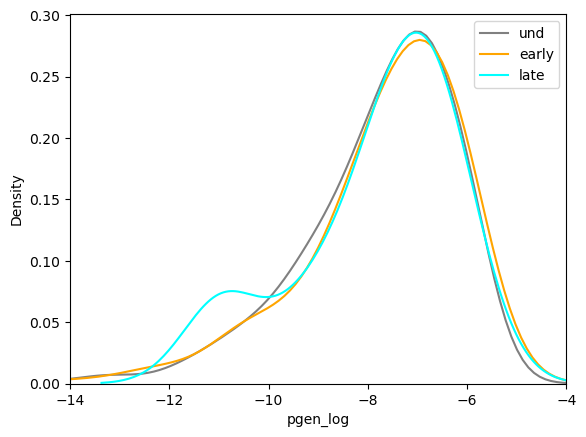

In [15]:
colormap = {'late':'cyan', 'early':'orange', 'und':'grey'}

ax = plt.subplot()
# sns.kdeplot(data=dfa_melt, 
#                 x = 'pgen_log', ax=ax, label = 'all', color='blue')
for c in dfa_melt['max_timepoint_class'].unique():
    print(c)
    sns.kdeplot(data=dfa_melt.loc[dfa_melt['max_timepoint_class'] == c], 
                x = 'pgen_log', ax=ax, label = c, color=colormap[c])
plt.legend()
plt.xlim(-14, -4)
plt.show()

und
early
late


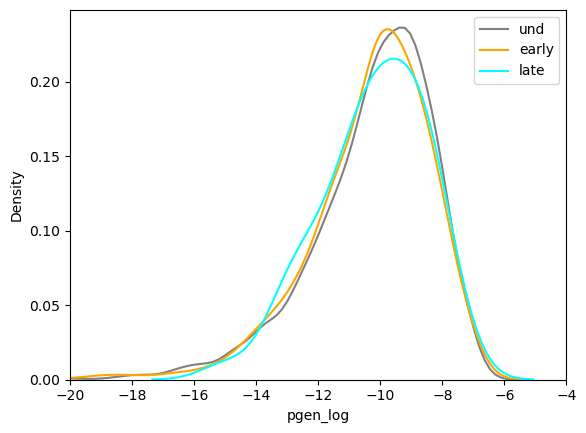

In [16]:
colormap = {'late':'cyan', 'early':'orange', 'und':'grey'}

ax = plt.subplot()
# sns.kdeplot(data=dfb_melt, 
#                 x = 'pgen_log', ax=ax, label = 'all', color='blue')
for c in dfb_melt['max_timepoint_class'].unique():
    print(c)
    sns.kdeplot(data=dfb_melt.loc[dfb_melt['max_timepoint_class'] == c], 
                x = 'pgen_log', ax=ax, label = c, color=colormap[c])
plt.legend()
plt.xlim(-20, -4)
plt.show()

In [17]:
LCMV = pd.DataFrame()

for f in os.listdir('../data/LCMVdata/'):
    if ('E_' in f) and ('_freq' in f):
        lcmv = pd.read_csv('../data/LCMVdata/' + f, index_col=0).reset_index(names='junction_aa')
        lcmv = pd.melt(lcmv, id_vars = ['junction_aa'])
        lcmv = lcmv.loc[lcmv['value'] > 0]
        lcmv[['epitope', 'condition', 'mouse']] = lcmv['variable'].str.split(' ', expand=True)
        LCMV = pd.concat([LCMV, lcmv]).reset_index(drop=True)

In [18]:
LCMV.head()

,junction_aa,variable,value,epitope,condition,mouse
0,CASGATSQNTLYF,GP66 LCMV40 M1,0.000002,GP66,LCMV40,M1
1,CASGDAGGRDQDTQYF,GP66 LCMV40 M1,0.000108,GP66,LCMV40,M1
2,CASGDAGGSYEQYF,GP66 LCMV40 M1,0.000086,GP66,LCMV40,M1
3,CASGDAGTGQDTQYF,GP66 LCMV40 M1,0.000077,GP66,LCMV40,M1
4,CASGDAGTGVDTQYF,GP66 LCMV40 M1,0.000196,GP66,LCMV40,M1


In [19]:
generative_model = load_model.GenerativeModelVDJ()
marginals_file_name = '../../OLGA/olga/default_models/mouse_T_beta/model_marginals.txt'
generative_model.load_and_process_igor_model(marginals_file_name)

params_file_name = '../../OLGA/olga/default_models/mouse_T_beta/model_params.txt'
V_anchor_pos_file ='../../OLGA/olga/default_models/mouse_T_beta/V_gene_CDR3_anchors.csv'
J_anchor_pos_file = '../../OLGA/olga/default_models/mouse_T_beta/J_gene_CDR3_anchors.csv'
genomic_data = load_model.GenomicDataVDJ()
genomic_data.load_igor_genomic_data(params_file_name, V_anchor_pos_file, J_anchor_pos_file)

In [20]:
pgen_b_mouse = pgen.GenerationProbabilityVDJ(generative_model, genomic_data)

In [21]:
LCMV['pgen'] = LCMV.apply(lambda row: 
                        pgen_b_mouse.compute_aa_CDR3_pgen(row['junction_aa'], 
                        print_warnings = True), axis=1)

In [22]:
LCMV.head()

,junction_aa,variable,value,epitope,condition,mouse,pgen
0,CASGATSQNTLYF,GP66 LCMV40 M1,0.000002,GP66,LCMV40,M1,3.310393e-07
1,CASGDAGGRDQDTQYF,GP66 LCMV40 M1,0.000108,GP66,LCMV40,M1,8.020268e-08
2,CASGDAGGSYEQYF,GP66 LCMV40 M1,0.000086,GP66,LCMV40,M1,1.855718e-06
3,CASGDAGTGQDTQYF,GP66 LCMV40 M1,0.000077,GP66,LCMV40,M1,7.568091e-07
4,CASGDAGTGVDTQYF,GP66 LCMV40 M1,0.000196,GP66,LCMV40,M1,1.020358e-07


In [23]:
LCMV_melt = pd.melt(LCMV[['pgen', 'condition', 'epitope']], id_vars = ['condition', 'epitope'])
LCMV_melt['pgen_log'] = np.log10(LCMV_melt['value'])
LCMV_melt = LCMV_melt.loc[LCMV_melt['value'] > 0]
print(LCMV_melt)

     condition epitope variable         value  pgen_log
0       LCMV40    GP66     pgen  3.310393e-07 -6.480120
1       LCMV40    GP66     pgen  8.020268e-08 -7.095811
2       LCMV40    GP66     pgen  1.855718e-06 -5.731488
3       LCMV40    GP66     pgen  7.568091e-07 -6.121014
4       LCMV40    GP66     pgen  1.020358e-07 -6.991247
...        ...     ...      ...           ...       ...
2330       PBS   NP396     pgen  1.111931e-05 -4.953922
2331       PBS   NP396     pgen  1.074273e-05 -4.968886
2332       PBS   NP396     pgen  1.096022e-05 -4.960181
2333       PBS   NP396     pgen  6.838931e-10 -9.165012
2334       PBS   NP396     pgen  3.390788e-09 -8.469699

[2335 rows x 5 columns]


LCMV40
LCMV8
PBS


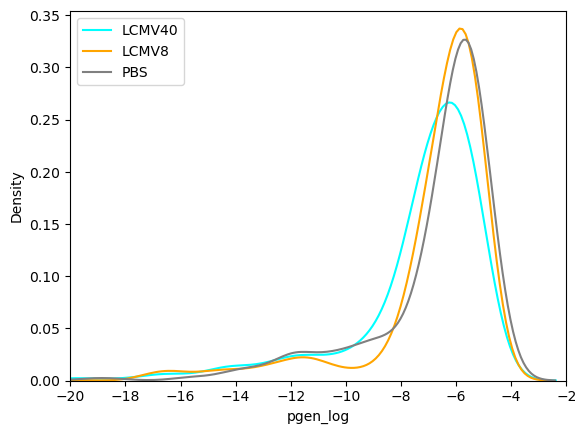

In [24]:
colormap = {'LCMV40':'cyan', 'LCMV8':'orange', 'PBS':'grey'}

ax = plt.subplot()
# sns.kdeplot(data=LCMV_melt, 
#                 x = 'pgen_log', ax=ax, label = 'all', color='blue')
for c in LCMV_melt['condition'].unique():
    print(c)
    sns.kdeplot(data=LCMV_melt.loc[LCMV_melt['condition'] == c], 
                x = 'pgen_log', ax=ax, label = c, color=colormap[c])
plt.legend()
plt.xlim(-20, -2)
plt.show()